In [1]:
!pip install wikipedia networkx

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
from operator import itemgetter
import networkx as nx
import wikipedia
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
sns.set()

In [3]:
SEED = "NeilGaiman".title()
STOPS = (
        "DC",
        "Amazon",
        "Movie",
        "Tv show",
        "Netflix",
        "screenwriting",
        "Marvel",
        "Story",
        "Film",
        )

In [4]:
todo_lst = [(0, SEED)] # The SEED is in the layer 0
todo_set = set(SEED) # The SEED itself
done_set = set() # Nothing is done yet

In [5]:
g = nx.DiGraph()
layer, page = todo_lst[0] 

In [6]:
%%time
while layer < 2:
  # Remove the name page of the current page from the todo_lst, 
  # and add it to the set of processed pages. 
  # If the script encounters this page again, it will skip over it.
  del todo_lst[0]
  done_set.add(page)
  
  # Show progress
  print(layer, page) 
  
  # Attempt to download the selected page.
  try:
    wiki = wikipedia.page(page)
  except:
    print("Could not load", page)
    layer, page = todo_lst[0]
    continue
  
  for link in wiki.links:
    link = link.title()
    if link not in STOPS and not link.startswith("List Of") and np.all([word.lower() not in link.lower() for word in STOPS]):
      if link not in todo_set and link not in done_set:
        todo_lst.append((layer + 1, link))
        todo_set.add(link)
      g.add_edge(page, link)
  layer, page = todo_lst[0]

1 Don Murphy
1 Don Ysidro
1 Donna Barr
1 Doomsday Book (Novel)
1 Dorling Kindersley
1 Double Star
Could not load Double Star
1 Down In The Bottomlands
1 Downbelow Station
Could not load Downbelow Station
1 Dr. Seuss
1 Dragon Pearl
1 Dragonflight
1 Dread Nation
Could not load Dread Nation
1 Dread In The Beast
Could not load Dread In The Beast
1 Dream (Character)
1 Dream (Comics)
1 Dreaming (Comics)
1 Dreamsnake
Could not load Dreamsnake
1 Duma Key
1 Dune (Novel)
1 Duran Duran
1 Dust Motes
1 Earthquake Weather (Novel)
1 East Grinstead
1 Eastern European Jews
1 Eclipse Comics
1 Ed Brubaker
1 Ed Kramer
1 Eddie Campbell
1 Edgar Allan Poe
1 Eisner Award
1 Eisner Award For Best Adaptation From Another Medium
1 Eisner Award For Best Writer
1 Element Girl
1 Elizabeth A. Lynn
1 Elizabeth Ann Scarborough
1 Elizabeth Bear
1 Elizabeth Moon
1 Elle Est Trois, (La Mort)
1 Ellen Kushner
1 Elric Of Melniboné
1 Emma Törzs
1 Empire (Magazine)
1 Ender'S Game
1 Endless (Comics)
1 Enemy Mine (Novella)
1 Ente

In [7]:
print("{} nodes, {} edges".format(len(g), nx.number_of_edges(g)))

99937 nodes, 271693 edges


In [8]:
# make a copy of raw graph
original = g.copy()
     

# remove self loops
g.remove_edges_from(nx.selfloop_edges(g))

# identify duplicates like that: 'network' and 'networks'
duplicates = [(node, node + "s") 
              for node in g if node + "s" in g
             ]

for dup in duplicates:
  # *dup is a technique named 'unpacking'
  g = nx.contracted_nodes(g, *dup, self_loops=False)

print(duplicates)

duplicates = []
ok_names = []
for x, y in [(node, node.replace("-", " ")) for node in g]:
    if x != y and y in g and y not in [y for x,y in duplicates]:
        duplicates.append((x,y))
    
print(duplicates)

for dup in duplicates:
  g = nx.contracted_nodes(g, *dup, self_loops=False)

# nx.contracted creates a new node/edge attribute called contraction
# the value of the attribute is a dictionary, but GraphML
# does not support dictionary attributes
nx.set_node_attributes(g, 0,"contraction")
nx.set_edge_attributes(g, 0,"contraction")

[('Audie Award', 'Audie Awards'), ('Bram Stoker Award', 'Bram Stoker Awards'), ('Copyright', 'Copyrights'), ('Eisner Award', 'Eisner Awards'), ('Graphic Novel', 'Graphic Novels'), ('Hugo Award', 'Hugo Awards'), ('Inkpot Award', 'Inkpot Awards'), ('Locus Award', 'Locus Awards'), ('Mythopoeic Award', 'Mythopoeic Awards'), ('Nebula Award', 'Nebula Awards'), ('Pulitzer Prize', 'Pulitzer Prizes'), ('Shirley Jackson Award', 'Shirley Jackson Awards'), ('World Fantasy Award', 'World Fantasy Awards'), ('Fanzine', 'Fanzines'), ('Robot', 'Robots'), ('Vampire', 'Vampires'), ('Molotov Cocktail', 'Molotov Cocktails'), ('Tactical Nuclear Weapon', 'Tactical Nuclear Weapons'), ('War Crime', 'War Crimes'), ('Arthur C. Clarke Award', 'Arthur C. Clarke Awards'), ('Homosexual', 'Homosexuals'), ('Prix Aurora Award', 'Prix Aurora Awards'), ('Science Fiction Author', 'Science Fiction Authors'), ('Hebrew', 'Hebrews'), ('National Book Award', 'National Book Awards'), ('God', 'Gods'), ('Jesuit', 'Jesuits'), ('No

In [9]:
print("{} nodes, {} edges".format(len(g), nx.number_of_edges(g)))

99494 nodes, 271321 edges


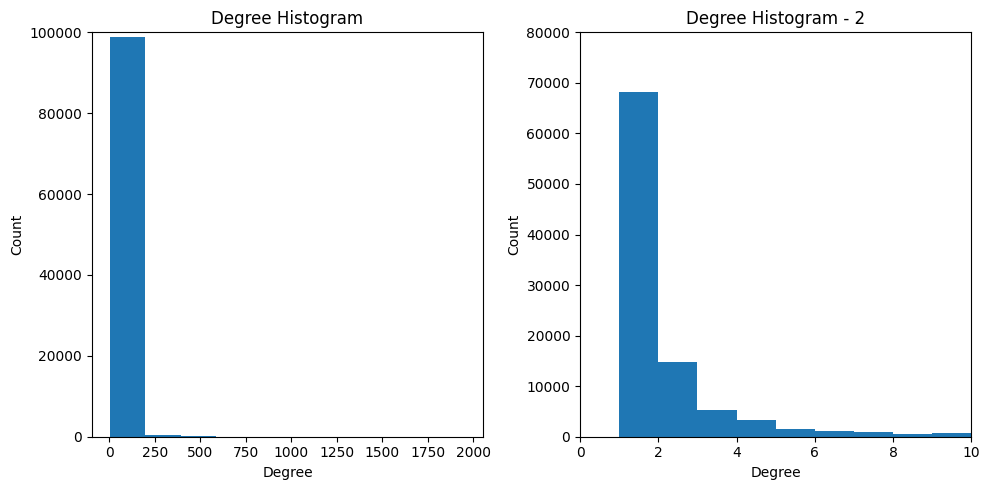

In [10]:
plt.style.use("default")
# degree sequence
degree_sequence = sorted([d for n, d in g.degree()], reverse=True)  

fig, ax = plt.subplots(1,2,figsize=(10,5))

# all_data has information about degree_sequence and the width of each bin
ax[0].hist(degree_sequence, bins = 10)
ax[1].hist(degree_sequence,bins=[1,2,3,4,5,6,7,8,9,10])

ax[0].set_title("Degree Histogram")
ax[0].set_ylabel("Count")
ax[0].set_xlabel("Degree")
ax[0].set_ylim(0,100000)

ax[1].set_title("Degree Histogram - 2")
ax[1].set_ylabel("Count")
ax[1].set_xlabel("Degree")
ax[1].set_xlim(0,10)
ax[1].set_ylim(0,80000)

plt.tight_layout()
plt.show()

In [11]:
core = [node for node, drg in dict(g.degree()).items() if drg > 2 ]
degrees = [drg for node, drg in dict(g.degree()).items() if drg > 2 ]

In [13]:
subg_g = nx.subgraph(g,core)
print(f'Nodes: {len(subg_g)} edges: {nx.number_of_edges(subg_g)}')
nx.write_graphml(subg_g, "neil_graiman.graphml")

Nodes: 16629 edges: 173722


In [ ]:
#the degree centrality of network(g)
fig, ax = plt.subplots(1,1,figsize=(10,8))

# layout position
pos = nx.spring_layout(subg_g,seed=8375,k=0.2)
# color of nodes
color = list(dict(nx.degree_centrality(subg_g)).values())

# draw edges
nx.draw_networkx_edges(subg_g,
                       pos=pos,
                       alpha=0.4, ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(subg_g,
                 pos=pos,
                 node_color=color,
                 cmap=plt.cm.jet,
                 ax=ax)

# draw labels
nx.draw_networkx_labels(subg_g, pos=pos,
                        font_color='white',
                        font_size = 5, 
                        ax=ax)


plt.axis("off")
plt.colorbar(nodes)
plt.savefig('degree_centrality.png', transparent=True,dpi=300)
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=84cb924b-f123-4e15-a431-a93b26bbb4e7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>